<a href="https://colab.research.google.com/github/Shubhangidharmik/Customer-Review-Analysis-by-NLP/blob/main/Customer_Review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
!pip install catboost
!pip install contractions
!pip install nltk
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [210]:
df = pd.read_csv('/content/gdrive/MyDrive/Customer_review/Customer_feedback.zip')
df.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [211]:
# Split the column with delimited data into separate columns
df[['review', 'sentiment', 'source','date','user','location','confidence']] = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)
df.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score",review,sentiment,source,date,user,location,confidence
0,"""I love this product!"", Positive, Twitter, 202...","""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible."", Negative, Yelp Re...","""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!"", Positive, IMDb, 2023...","""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...","""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!"", Positive...","""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [212]:
df.drop(columns=['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'],inplace=True)

In [23]:
df.head(10)

,review,sentiment,source,date,user,location,confidence
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65


In [213]:
#removal of white space

df['review']=df['review'].str.lower().astype(str)
df['review']

0                                "i love this product!"
1                           "the service was terrible."
2                              "this movie is amazing!"
3     "i'm so disappointed with their customer suppo...
4                  "just had the best meal of my life!"
                            ...                        
93    "i can't stop listening to this song. it's my ...
94    "their website is so confusing and poorly desi...
95    "i had an incredible experience at the theme p...
96                                                  nan
97                                                  nan
Name: review, Length: 98, dtype: object

In [74]:
df.describe()

,review,sentiment,source,date,user,location,confidence
count,98,96,96,96,96,96,96
unique,76,2,27,75,73,11,25
top,"""i love this product!""",Positive,Online Store,2023-06-15 09:23:14,user456,Sydney,0.92
freq,2,53,11,2,4,12,9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      96 non-null     object
 1   sentiment   96 non-null     object
 2   source      96 non-null     object
 3   date        96 non-null     object
 4   user        96 non-null     object
 5   location    96 non-null     object
 6   confidence  96 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


In [29]:
df.columns

Index(['review', 'sentiment', 'source', 'date', 'user', 'location',
       'confidence'],
      dtype='object')

In [30]:
df.isnull().sum()

review        2
sentiment     2
source        2
date          2
user          2
location      2
confidence    2
dtype: int64

In [214]:
df = df.dropna()

In [42]:
df.groupby('location')['sentiment'].count()

location
 Berlin           10
 Chicago           5
 London           11
 Los Angeles       9
 Mumbai            8
 New York          8
 Orlando           5
 Paris            10
 San Francisco     8
 Sydney           12
 Toronto          10
Name: sentiment, dtype: int64

In [173]:
df['sentiment'].value_counts()

sentiment
 Positive    53
 Negative    43
Name: count, dtype: int64

In [215]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()



array([1, 0])

In [46]:
df['location'].value_counts()

location
 Sydney           12
 London           11
 Toronto          10
 Paris            10
 Berlin           10
 Los Angeles       9
 New York          8
 San Francisco     8
 Mumbai            8
 Orlando           5
 Chicago           5
Name: count, dtype: int64

In [44]:
df['source'].value_counts()

source
 Online Store           11
 Spotify                 9
 Zomato                  7
 Website Review          7
 IMDb                    6
 TripAdvisor             6
 Goodreads               6
 Yelp Reviews            6
 Website Testimonial     4
 Online Chat             4
 Event Review            3
 Theme Park Review       3
 Music Review            3
 Hotel Review            2
 Online Helpdesk         2
 Retail Store            2
 Twitter                 2
 Trip Report             2
 Amazon Reviews          2
 Online Forum            2
 Airline Review          1
 Gaming Forum            1
 Travel Website          1
 Food Blog               1
 TV Show Review          1
 Art Review              1
 Travel Blog             1
Name: count, dtype: int64

In [45]:
df['user'].value_counts()

user
 user456              4
 @user123             2
 travelenthusiast1    2
 foodlover2468        2
 traveler789          2
                     ..
 foodcritic123        1
 playlistlover456     1
 user24680            1
 thrillseeker789      1
 happyshopper1        1
Name: count, Length: 73, dtype: int64

In [216]:
#Tokenization

from nltk.tokenize import word_tokenize

In [217]:
df.shape

(96, 7)

In [218]:
df['review'] = df['review'].replace(r'\d+', '', regex=True)
def tokenization(inputs):
    return word_tokenize(inputs)
df['review'] = df['review'].apply(tokenization)
df['review']

0                   [``, i, love, this, product, !, '']
1              [``, the, service, was, terrible, ., '']
2                 [``, this, movie, is, amazing, !, '']
3     [``, i, 'm, so, disappointed, with, their, cus...
4     [``, just, had, the, best, meal, of, my, life,...
                            ...                        
91    [``, just, had, the, most, amazing, vacation, ...
92    [``, the, food, at, this, restaurant, was, awf...
93    [``, i, ca, n't, stop, listening, to, this, so...
94    [``, their, website, is, so, confusing, and, p...
95    [``, i, had, an, incredible, experience, at, t...
Name: review, Length: 96, dtype: object

In [219]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')

def stopwordsRemove(inputs):
    return [item for item in inputs if item not in stop_words]


df['review'] = df['review'].apply(stopwordsRemove)
df['review']

0                            [``, love, product, !, '']
1                        [``, service, terrible, ., '']
2                           [``, movie, amazing, !, '']
3      [``, 'm, disappointed, customer, support, ., '']
4                         [``, best, meal, life, !, '']
                            ...                        
91    [``, amazing, vacation, !, ca, n't, wait, go, ...
92    [``, food, restaurant, awful, ., never, going,...
93    [``, ca, n't, stop, listening, song, ., 's, ne...
94    [``, website, confusing, poorly, designed, ., '']
95    [``, incredible, experience, theme, park, ., m...
Name: review, Length: 96, dtype: object

In [220]:
def removePunctuation(inputs):
    p = re.compile(r'[^\w\s]+')
    return p.sub('', inputs)
df['review'] = df['review'].apply(lambda x: list(map(removePunctuation, x)))
df['review']

0                                 [, love, product, , ]
1                             [, service, terrible, , ]
2                                [, movie, amazing, , ]
3            [, m, disappointed, customer, support, , ]
4                              [, best, meal, life, , ]
                            ...                        
91    [, amazing, vacation, , ca, nt, wait, go, back...
92    [, food, restaurant, awful, , never, going, ba...
93    [, ca, nt, stop, listening, song, , s, new, fa...
94         [, website, confusing, poorly, designed, , ]
95    [, incredible, experience, theme, park, , much...
Name: review, Length: 96, dtype: object

In [221]:
def removeEmoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review'] = df['review'].apply(lambda x: list(map(removeEmoji, x)))
df['review']

0                                 [, love, product, , ]
1                             [, service, terrible, , ]
2                                [, movie, amazing, , ]
3            [, m, disappointed, customer, support, , ]
4                              [, best, meal, life, , ]
                            ...                        
91    [, amazing, vacation, , ca, nt, wait, go, back...
92    [, food, restaurant, awful, , never, going, ba...
93    [, ca, nt, stop, listening, song, , s, new, fa...
94         [, website, confusing, poorly, designed, , ]
95    [, incredible, experience, theme, park, , much...
Name: review, Length: 96, dtype: object

In [222]:
def removeLessThan_2(inputs):
    return [j for j in inputs if len(j) > 2]
df['review'] = df['review'].apply(removeLessThan_2)
df['review']

0                                      [love, product]
1                                  [service, terrible]
2                                     [movie, amazing]
3                    [disappointed, customer, support]
4                                   [best, meal, life]
                            ...                       
91                     [amazing, vacation, wait, back]
92       [food, restaurant, awful, never, going, back]
93              [stop, listening, song, new, favorite]
94              [website, confusing, poorly, designed]
95    [incredible, experience, theme, park, much, fun]
Name: review, Length: 96, dtype: object

In [223]:
lemmatizer = WordNetLemmatizer()
def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

df['review'] = df['review'].apply(lemmatization)

df['review'] = df['review'].str.join(' ')
df['review'].dropna()

0                                  love product
1                              service terrible
2                                   movie amaze
3                   disappoint customer support
4                                best meal life
                        ...                    
91                     amaze vacation wait back
92          food restaurant awful never go back
93                stop listen song new favorite
94                website confuse poorly design
95    incredible experience theme park much fun
Name: review, Length: 96, dtype: object

In [224]:
vectorizer = TfidfVectorizer()
df_vect = vectorizer.fit_transform(df['review'])
df_vect

<96x214 sparse matrix of type '<class 'numpy.float64'>'
	with 489 stored elements in Compressed Sparse Row format>

In [225]:
df['sentiment'] = [i for i in df['sentiment']]
df['sentiment'].value_counts()

sentiment
1    53
0    43
Name: count, dtype: int64

In [226]:
X=df_vect
Y=df['sentiment']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [228]:
names=[
    "LogisticRegression",
    "RandomForest",

]
models={
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [229]:
accuracies=[]
ras=[]
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)

    AS=accuracy_score(Y_test, Y_pred)
    RAS=roc_auc_score(Y_test, Y_pred)
    accuracies.append(AS)
    ras.append(RAS)

    print(f'Results for {name}')
    print('Accuracy score', AS)
    print('roc_auc_score', RAS)
    print()

Results for LogisticRegression
Accuracy score 0.896551724137931
roc_auc_score 0.8846153846153846

Results for RandomForestClassifier
Accuracy score 0.9310344827586207
roc_auc_score 0.9230769230769231



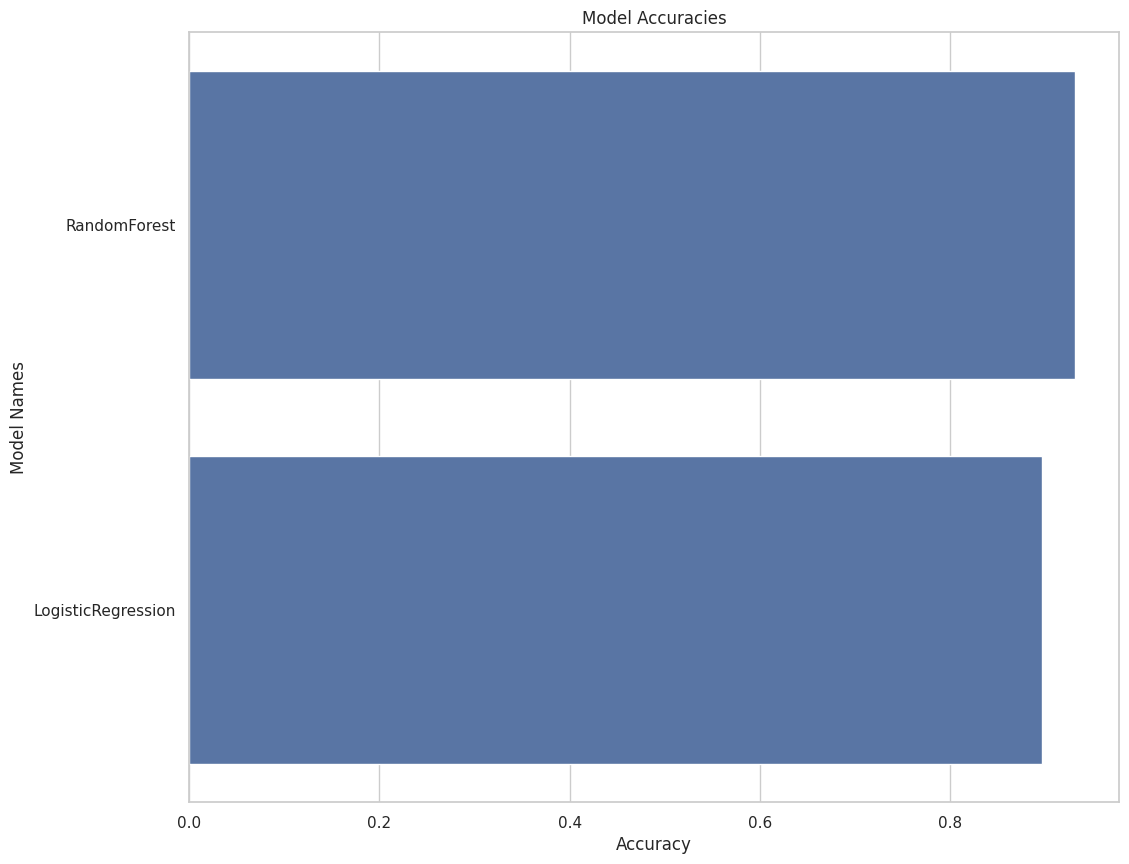

In [230]:
data = pd.DataFrame({"Names": names, "Accuracies": accuracies}).sort_values(by=['Accuracies'], ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

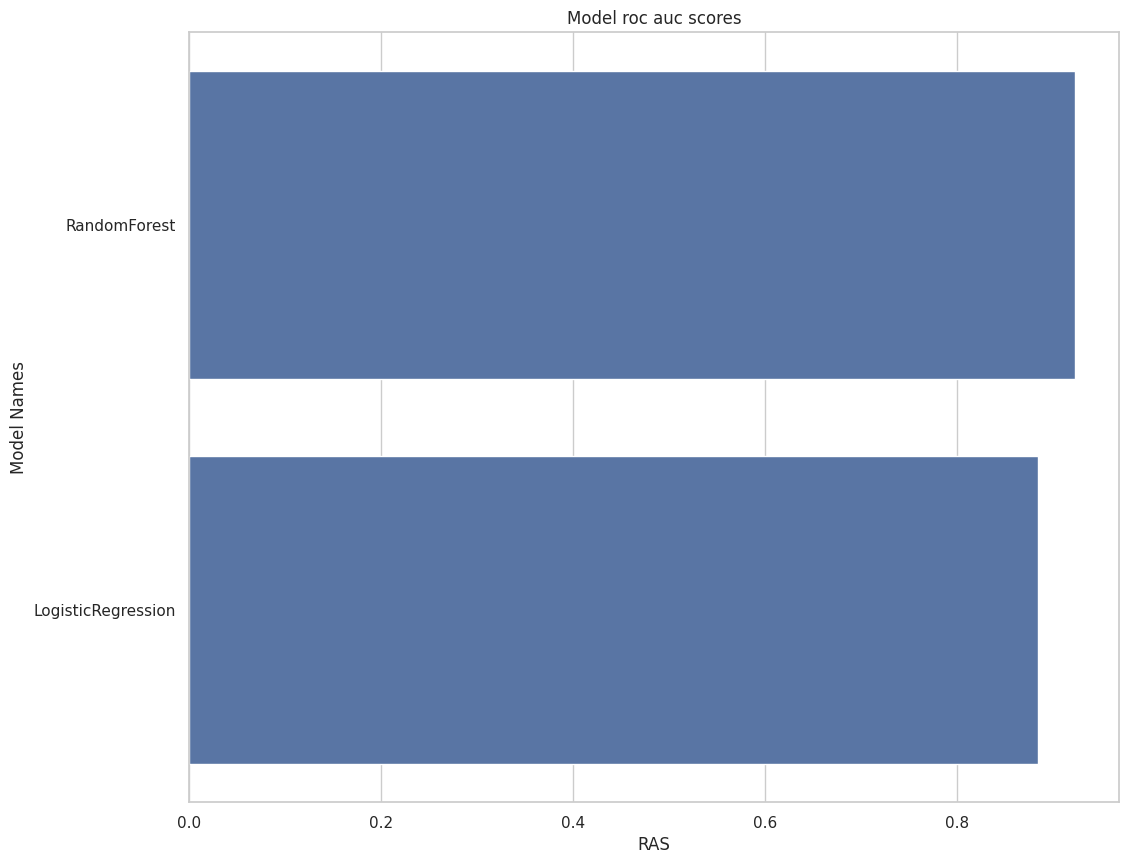

In [231]:
data2 = pd.DataFrame({"Names": names, "ras": ras}).sort_values(by=['ras'], ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

sns.barplot(x="ras", y="Names", data=data2, color="b")

plt.xlabel("RAS")
plt.ylabel("Model Names")
plt.title("Model roc auc scores")

plt.show()

<Axes: >

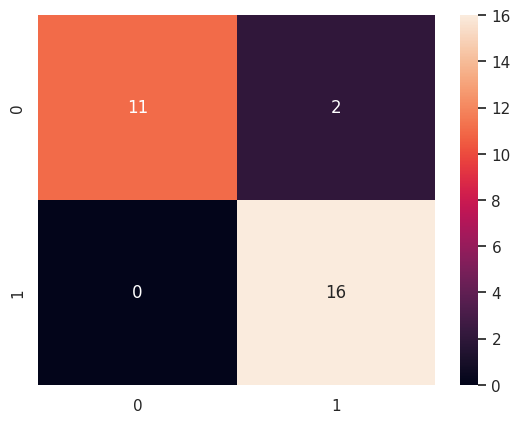

In [232]:
model_RF=RandomForestClassifier()
model_RF.fit(X_train, Y_train)
Y_pred=model_RF.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)